In [21]:
## Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras.utils as image
import os

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.models import Sequential

## Loading Multi-class weather dataset

In [22]:
data_dir = 'dataset' ## Path to multi-class weather dataset
classes = ['cloudy', 'rain', 'shine', 'sunrise'] #ID classes
## Create empty lists to hold the file paths and labels
filepaths = []
labels = []

## Iterate over each file in the data directory
for filename in os.listdir(data_dir):
    
    ## Check if the file is a PNG image
    if filename.endswith('.jpg'):
        
        ## Extract the class name from the file name
        class_name = filename.split('.')[0]
        
        ## Iterate over each class and check if the class name contains the class
        for i, c in enumerate(classes):
            if c in class_name:
                
                ## If the class is found in the file name, add the file path and label to the corresponding lists
                filepaths.append(os.path.join(data_dir, filename))
                labels.append(classes[i])
                
                ## Break out of the inner loop to avoid adding the same file to multiple classes
                break

In [23]:
## Load the file paths and labels into a Pandas DataFrame
df = pd.DataFrame({'filepath': filepaths, 'label': labels})

## Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [24]:
train_df.head()

,filepath,label
1103,dataset\sunrise81.jpg,sunrise
867,dataset\sunrise190.jpg,sunrise
184,dataset\cloudy265.jpg,cloudy
1041,dataset\sunrise347.jpg,sunrise
1117,dataset\sunrise95.jpg,sunrise


## Data preparation - preprocessing images

In [25]:
## Define the input shape of the images | reshaped to 128 x 128
input_shape = (128, 128, 3)

## Define the number of classes
num_classes = len(classes)

## Create an instance of the ImageDataGenerator for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  ## Scale the pixel values to the range [0, 1], good for faster model training
)

## Create an instance of the ImageDataGenerator for the testing data
test_datagen = ImageDataGenerator(rescale=1./255)

## Define the batch size of 32 samples
batch_size = 32

In [13]:
## Create the generators for the training and testing data
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filepath',
    y_col='label',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filepath',
    y_col='label',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
)

Found 897 validated image filenames belonging to 4 classes.
Found 225 validated image filenames belonging to 4 classes.


## Training Convolutional Neural Network (CNN) Model

In [26]:
# Defining the CNN model with dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [15]:
## See Model Architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [16]:
## Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the model
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=test_generator)

Epoch 1/30
29/29 [==============================] - 28s 896ms/step - loss: 0.9478 - accuracy: 0.5819 - val_loss: 0.5883 - val_accuracy: 0.7822
Epoch 2/30
29/29 [==============================] - 17s 581ms/step - loss: 0.5667 - accuracy: 0.8138 - val_loss: 0.5865 - val_accuracy: 0.7644
Epoch 3/30
29/29 [==============================] - 16s 554ms/step - loss: 0.5641 - accuracy: 0.7815 - val_loss: 0.4133 - val_accuracy: 0.8489
Epoch 4/30
29/29 [==============================] - 16s 575ms/step - loss: 0.5551 - accuracy: 0.8138 - val_loss: 0.3729 - val_accuracy: 0.8667
Epoch 5/30
29/29 [==============================] - 17s 589ms/step - loss: 0.3591 - accuracy: 0.8707 - val_loss: 0.3413 - val_accuracy: 0.8978
Epoch 6/30
29/29 [==============================] - 16s 555ms/step - loss: 0.3252 - accuracy: 0.8997 - val_loss: 0.3405 - val_accuracy: 0.8578
Epoch 7/30
29/29 [==============================] - 21s 727ms/step - loss: 0.2805 - accuracy: 0.9097 - val_loss: 0.2680 - val_accuracy: 0.9022

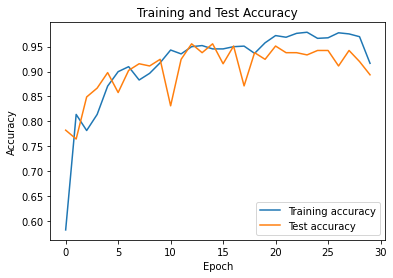

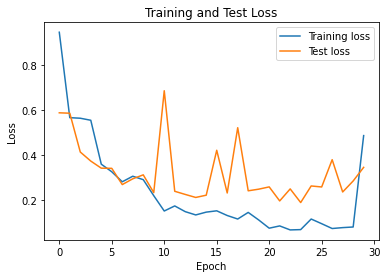

In [27]:
## Plot the training and testing accuracy curves
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Plot the training and testing loss curves
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## New Data Inference

In [30]:
## Change Path to Image
path_to_image = 'dataset/cloudy1.jpg'

## Load the image and resize to 128x128
new_image = image.load_img(path_to_image, target_size=(128, 128))

## Convert the image to a numpy array
new_image_array = image.img_to_array(new_image)

## Reshape the array to match the input shape of the model
new_image_array = new_image_array.reshape((1, 128, 128, 3))

## Scale the pixel values to be between 0 and 1
new_image_array = new_image_array / 255.0

## Make a prediction using the model
prediction = model.predict(new_image_array)

## Assign class label with the highest probability
class_label = classes[np.argmax(prediction)]

## Print the predicted class label
print('The predicted class label is:', class_label)

1/1 [==============================] - 0s 23ms/step
The predicted class label is: cloudy
